In [495]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [496]:
# import warnings
# warnings.filterwarnings('ignore')

In [497]:
pd.pandas.set_option("display.max_rows",None)
pd.pandas.set_option("display.max_columns",None)

In [498]:
df_train=pd.read_csv('train_housing.csv')
df_test=pd.read_csv('test_housing.csv')

In [499]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [500]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [501]:
solution = pd.DataFrame({"id":df_test.Id})
#solution.to_csv("ridge_sol.csv", index = False)

Credits to : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook

# Steps - EDA

1. Exploring the feature type (Numerical or Categorical)
2. Segmentation - Categorize each feature into some pre-defined group based on what physical feature they represent - Location & Neighbourhood, Construction Quality, Rental and Re-Sale Value, Connectivity from the Major Points , Carpet Area (Bedroom + Living room + Kitchen + Bathroom + Encloed Balcony)
3. Expectation - How much a feature influence SalePrice - High(2),Mid(1),Low(0)
4. Remarks - Why put into certain category , why we assume certain expectation value of a feature

Now we can create a excel file & document the above mentioned data but here we have 80 columns so it will be time consuming - So doing step 2 partially & leaving the rest , as this step is very important for feature engineering , Here value in each column defines the Expectation

In [502]:
housing_price_feature=pd.read_csv('Housing_Price_Feature.csv')
housing_price_feature

,Feature,Location & Neighbourhood,Construction Quality,Rental and Re-Sale Value,Connectivity,Carpet Area,Remarks
0,MSSubClass,0,0,2,0,0,type of dwelling involved in the sale.
1,MSZoning,0,0,2,0,0,the general zoning classification of the sale
2,LotFrontage,1,2,0,0,0,Linear feet of street connected to property
3,LotArea,1,0,1,1,0,Lot size in square feet
4,Street,0,0,0,1,0,Type of road access to property (Alley is more...
5,Alley,0,0,0,2,0,Type of alley access to property
6,LotShape,0,2,2,1,0,"General shape of property (Regular, Slightly i..."
7,LandContour,1,2,2,1,0,Flatness of the property
8,Utilities,2,2,2,1,0,Type of utilities available
9,LotConfig,2,2,2,1,0,Lot configuration


In [503]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [504]:
def check_data(data):
    # check for duplicate row
    _tmp=data.duplicated().tolist()
    op="Yes" if any(_tmp)==True else "No"
    print("Does data contain any duplicated row ? ",op)
    #check missing value per feature top 20
    pct_missing=data.isnull().sum()*100/len(data)
    missing_data=pd.DataFrame({"Missing value %":pct_missing})
    missing_data.sort_values(by="Missing value %",ascending=False,inplace=True)
    print(missing_data[:20])

we see a lot of features with missing values can we drop them ?<br>
No not so early we need to check the relationship between missing values and SalesPrice first 
But first check if SalePrice is normally distributed or not

In [505]:
check_data(df_train)

Does data contain any duplicated row ?  No
              Missing value %
PoolQC              99.520548
MiscFeature         96.301370
Alley               93.767123
Fence               80.753425
FireplaceQu         47.260274
LotFrontage         17.739726
GarageYrBlt          5.547945
GarageCond           5.547945
GarageType           5.547945
GarageFinish         5.547945
GarageQual           5.547945
BsmtFinType2         2.602740
BsmtExposure         2.602740
BsmtQual             2.534247
BsmtCond             2.534247
BsmtFinType1         2.534247
MasVnrArea           0.547945
MasVnrType           0.547945
Electrical           0.068493
Id                   0.000000


In [506]:
check_data(df_test)

Does data contain any duplicated row ?  No
              Missing value %
PoolQC              99.794380
MiscFeature         96.504455
Alley               92.666210
Fence               80.123372
FireplaceQu         50.034270
LotFrontage         15.558602
GarageYrBlt          5.346127
GarageQual           5.346127
GarageFinish         5.346127
GarageCond           5.346127
GarageType           5.209047
BsmtCond             3.084304
BsmtQual             3.015764
BsmtExposure         3.015764
BsmtFinType1         2.878684
BsmtFinType2         2.878684
MasVnrType           1.096642
MasVnrArea           1.028101
MSZoning             0.274160
BsmtHalfBath         0.137080


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

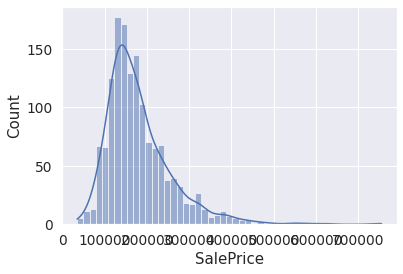

In [507]:
sns.histplot(df_train["SalePrice"],kde=True)

In [508]:
print("Kurtosis : ",df_train["SalePrice"].kurtosis(skipna=True))
print("Skewness : ",df_train["SalePrice"].skew(skipna=True))
print("No. of zero values : ",sum(df_train["SalePrice"]==0))

Kurtosis :  6.536281860064529
Skewness :  1.8828757597682129
No. of zero values :  0


So we see Skewness > 1 : data highly skewed , Kurtosis > 3 : +ve Kurtosis , No. of zero value == 0 
==> we apply log10 transformation

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

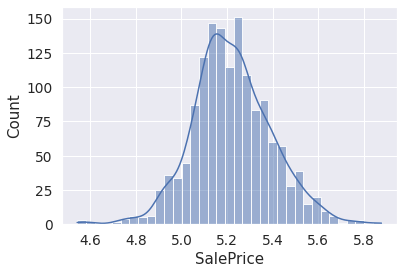

In [509]:
df_train["SalePrice"]=np.log10(df_train["SalePrice"])
sns.histplot(df_train["SalePrice"],kde=True)

Credits : https://www.kaggle.com/code/juliencs/a-study-on-regression-applied-to-the-ames-dataset/notebook

1. Converting some numerical feature to categorical 
2. Encode categorical feature to ordinal feature
3. Simplification of existing Feature

In [510]:
def converting_feature(data):
    # drop Id column - if exist
    #data.drop(["Id"],axis=1,inplace=True, errors="ignore")
    # coverting some numerical feature to categorical
    data=data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })
    # encode categorical feature as ordered number when there is information in the order
    data=data.replace({
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}})
    return data

In [511]:
def feature_simplify(data):
    
    # replacing existing feature
    
    data["OverallQual"]=data["OverallQual"].replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
    data["OverallCond"]=data["OverallCond"].replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
    data["GarageCond"]=data["GarageCond"].replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
    data["GarageQual"]=data["GarageQual"].replace({1 : 1, # bad
                                                         2 : 1, 3 : 1, # average
                                                         4 : 2, 5 : 2 # good
                                                        })
    data["FireplaceQu"]=data["FireplaceQu"].replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          })
    data["FireplaceQu"]=data["FireplaceQu"].replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          })
    data["Functional"]=data["Functional"].replace({1 : 1, 2 : 1, # bad
                                                         3 : 2, 4 : 2, # major
                                                         5 : 3, 6 : 3, 7 : 3, # minor
                                                         8 : 4 # typical
                                                        })
    data["KitchenQual"]=data["KitchenQual"].replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          })
    data["HeatingQC"]=data["HeatingQC"].replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
    data["BsmtFinType1"]=data["BsmtFinType1"].replace({1 : 1, # unfinished
                                                             2 : 1, 3 : 1, # rec room
                                                             4 : 2, 5 : 2, 6 : 2 # living quarters
                                                            })
    data["BsmtFinType2"]=data["BsmtFinType2"].replace({1 : 1, # unfinished
                                                             2 : 1, 3 : 1, # rec room
                                                             4 : 2, 5 : 2, 6 : 2 # living quarters
                                                            })
    data["BsmtCond"]=data["BsmtCond"].replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
    data["BsmtQual"]=data["BsmtQual"].replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
    data["ExterCond"]=data["ExterCond"].replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
    data["ExterQual"]=data["ExterQual"].replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
    return data

In [512]:

def transform_data(data):
    skewness = data.skew(skipna=True).sort_values(ascending=False)
    skewness = skewness[skewness > 0.5 ]
    print(str(skewness.shape[0]) + " substantially +ve skewed numerical features to log1p(x) transform")
    if skewness.shape[0]>0:
        skewed_features = skewness.index
        data[skewed_features] = np.log1p(data[skewed_features])
    return data

In [513]:
df_train=converting_feature(df_train)
df_train=feature_simplify(df_train)
df_train=transform_data(df_train)

32 substantially +ve skewed numerical features to log1p(x) transform


/tmp/ipykernel_3102/3620923077.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = data.skew(skipna=True).sort_values(ascending=False)


In [514]:
df_test=converting_feature(df_test)
df_test=feature_simplify(df_test)
df_test=transform_data(df_test)

32 substantially +ve skewed numerical features to log1p(x) transform


/tmp/ipykernel_3102/3620923077.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = data.skew(skipna=True).sort_values(ascending=False)


Credits : https://www.kaggle.com/code/shashankasubrahmanya/missing-data-imputation-using-regression/notebook



# Using Regression to impute missing data
When we have multiple variables with missing values, we can't just directly use Regression Imputation to impute one of them as the predictors contain missing data themselves. But then, how can we impute one variable without imputing another?

We can avoid this Catch-22 situation by initially imputing all the variables with missing values using some trivial methods like Simple Random Imputation (we impute the missing data with random observed values of the variable) which is later followed by Regression Imputation of each of the variables iteratively



The function random_imputation replaces the missing values with some random observed values of the variable. The method is repeated for all the variables containing missing values, after which they serve as parameters in the regression model to estimate other variable values.

In [515]:
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [516]:
def preprocess_to_category(data):
    data_num=data.select_dtypes(include=np.number)
    data_obj=data.select_dtypes(include="object")
    return data_num,data_obj

In [517]:
def random_imputation(datata, feature):
    # we need to create new feature column called feature_imp - reference to 
    number_missing = data[feature].isnull().sum()
    observed_values = data.loc[data[feature].notnull(), feature]
    data.loc[data[feature].isnull(), feature] = np.random.choice(observed_values, 
                                                                      number_missing, replace = True)

    return data

In [518]:
def numerical_imputation(data,missing_columns):
    
    """ create new column named Ran_column containing missing_columns """
    #rand_data=pd.DataFrame(columns=["Ran"+name for name in missing_columns])
    
    for feature in missing_columns:
        
        #rand_data["Ran"+feature]=data[feature+"_imp"]
        parameters=list(set(data.columns) - set(missing_columns) - {feature})
        
        lr=linear_model.LinearRegression()
        lr.fit(X=data[parameters],y=data[feature])
        
        # 
        predict = lr.predict(data[parameters])
        std_error= (predict[data[feature].notnull()]-data.loc[data[feature].notnull(),feature]).std()
        
        random_predict=np.random.normal(size =data[feature].shape[0], loc = predict,scale = std_error)
        
        criterion=(data[feature].isnull()) & (random_predict > 0)
        #rand_data.loc[criterion,"Ran"+feature]=random_predict[criterion]
        data.loc[criterion,feature]=random_predict[criterion]
    
    return data

In [519]:
def categorical_imputation(data):
    data=data.apply(lambda series: pd.Series(LabelEncoder().fit_transform(series[series.notnull()]),
                                             index=series[series.notnull()].index))
    imp_cat=IterativeImputer(estimator=RandomForestClassifier(n_estimators=10),
                             initial_strategy='most_frequent',max_iter=5,random_state=0)
    data=imp_cat.fit_transform(data)
    
    return data

In [520]:
data=df_train

In [521]:
data_num,data_obj = preprocess_to_category(data)

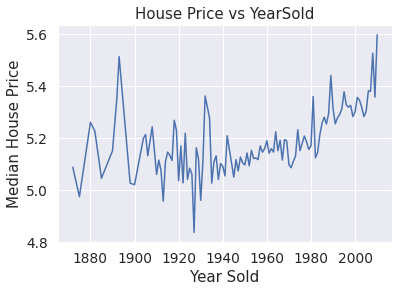

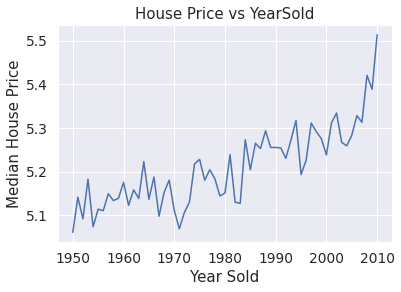

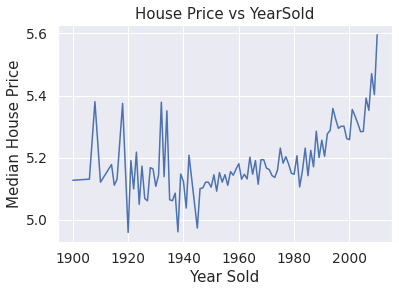

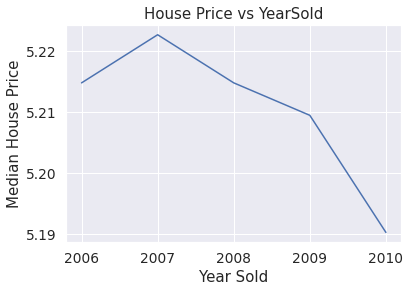

In [522]:
# list of variables that contain year information
year_feature = [feature for feature in data_num if 'Yr' in feature or 'Year' in feature]

year_feature



## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price
dataset=data.copy()
for feature in year_feature:
    dataset.groupby(feature)['SalePrice'].median().plot()
    plt.xlabel('Year Sold')
    plt.ylabel('Median House Price')
    plt.title("House Price vs YearSold")
    plt.show()

Discrete Variables Count: 33


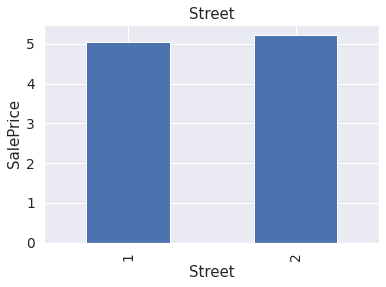

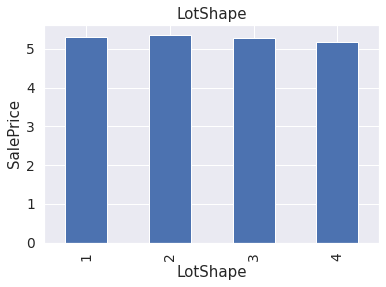

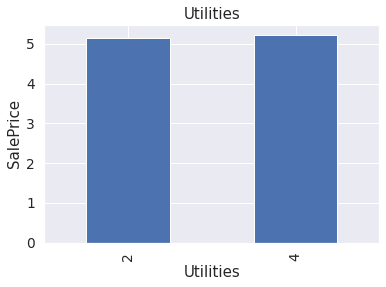

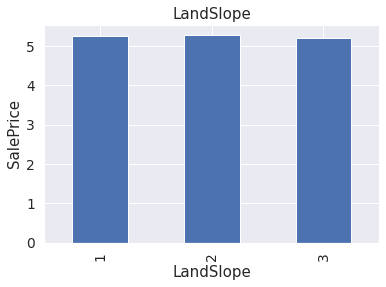

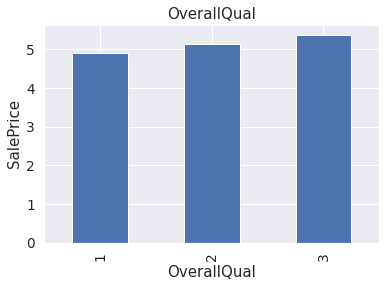

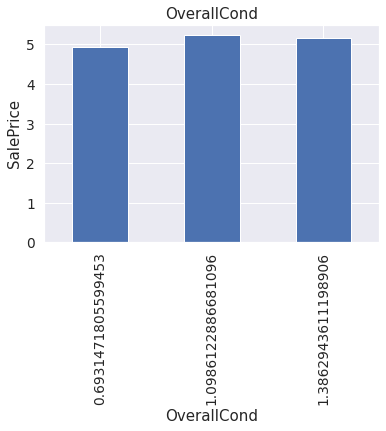

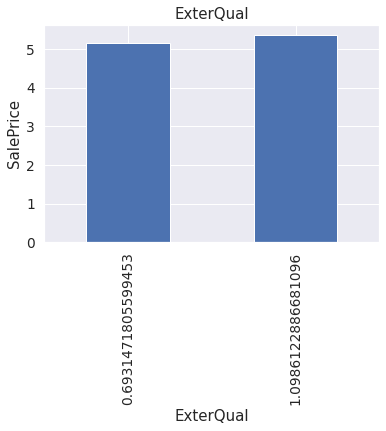

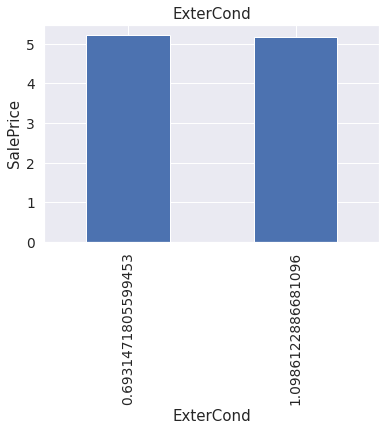

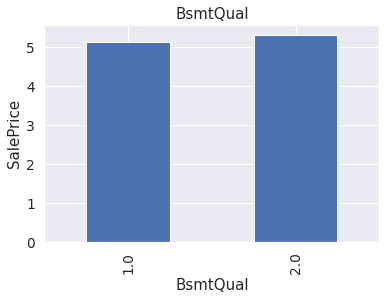

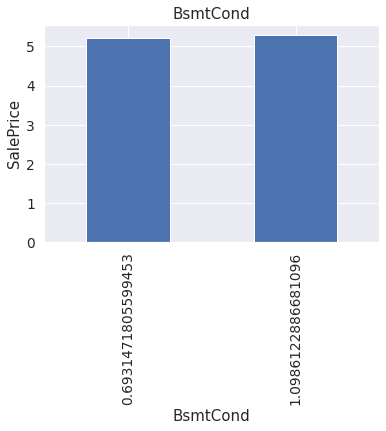

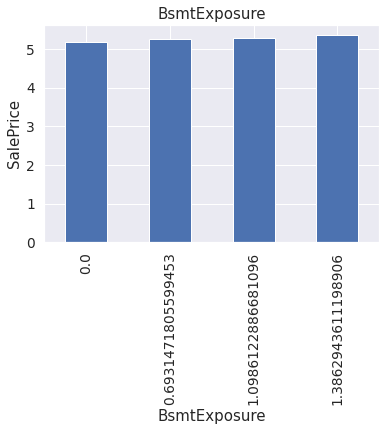

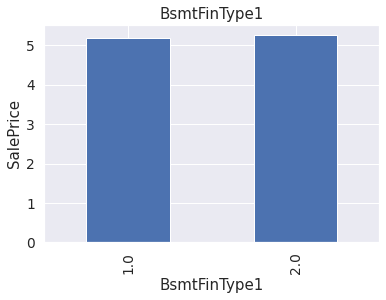

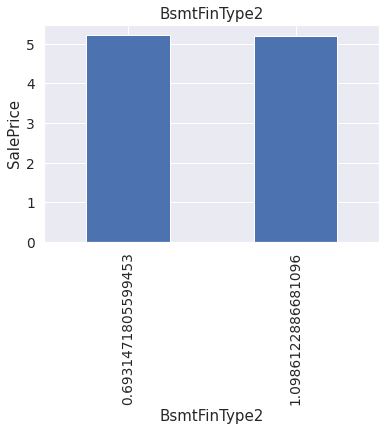

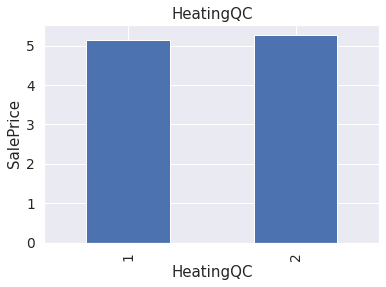

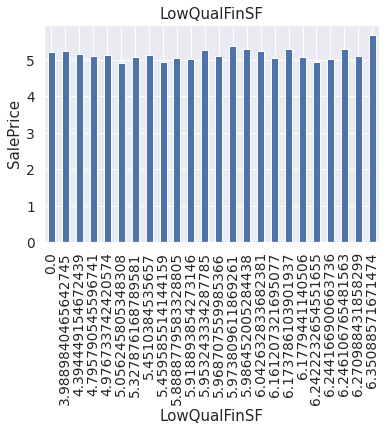

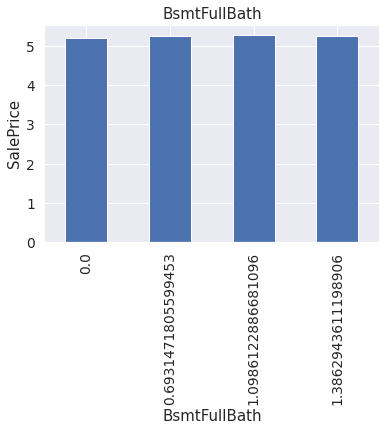

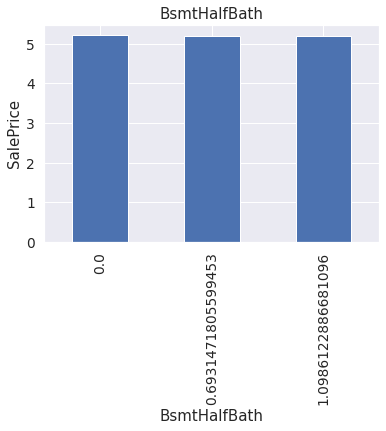

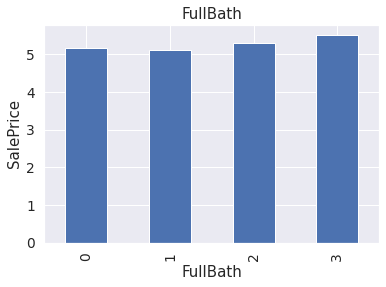

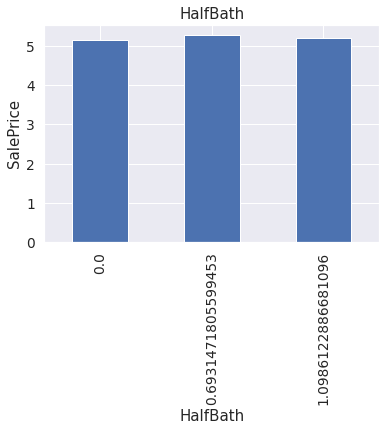

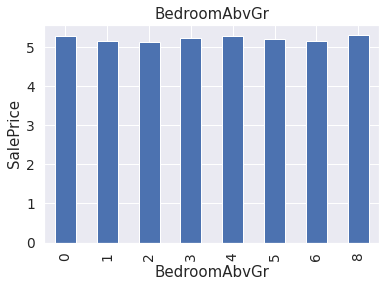

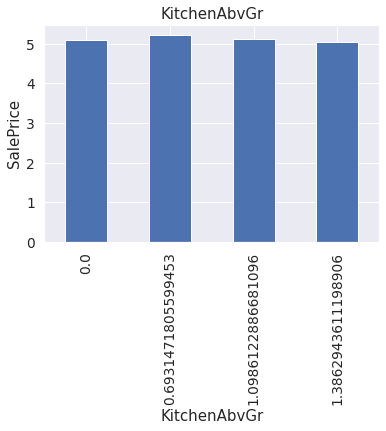

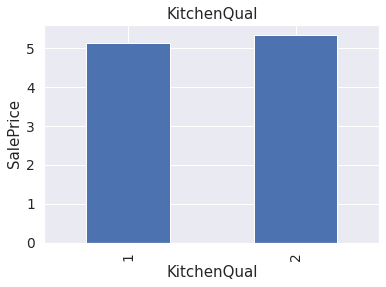

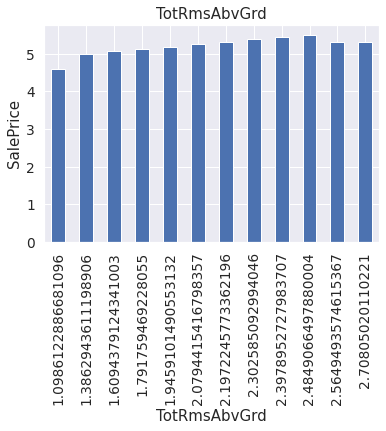

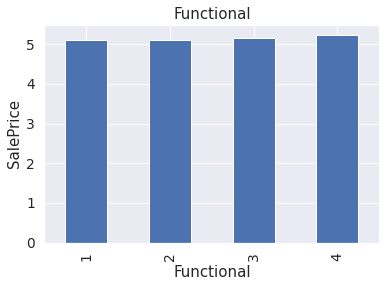

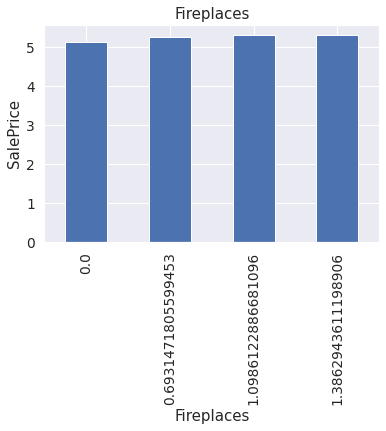

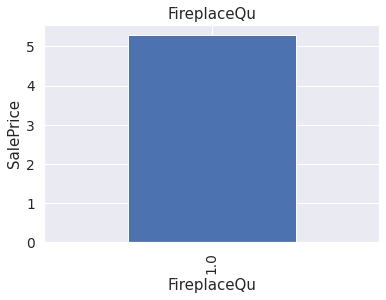

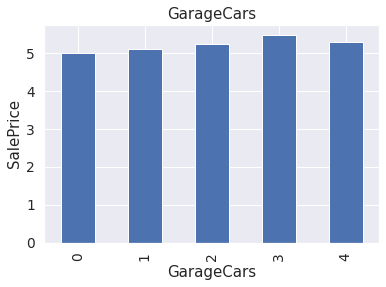

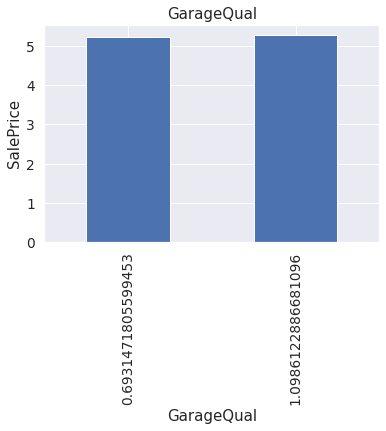

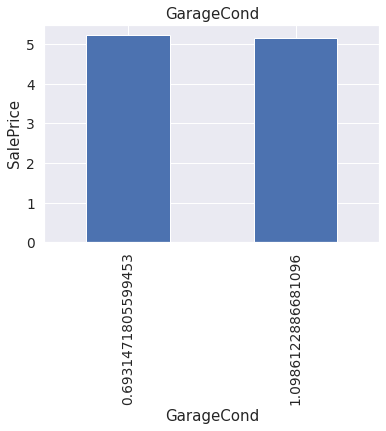

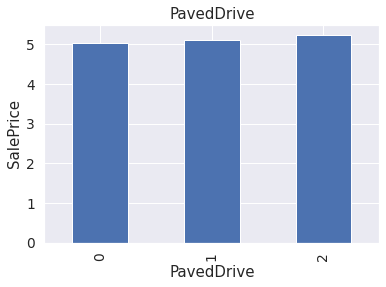

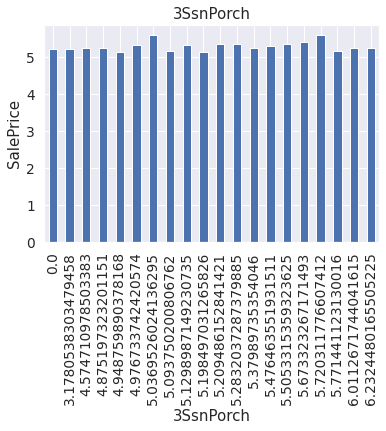

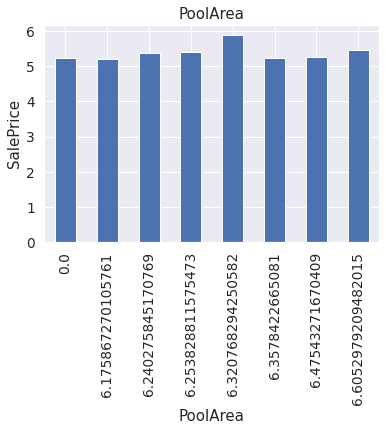

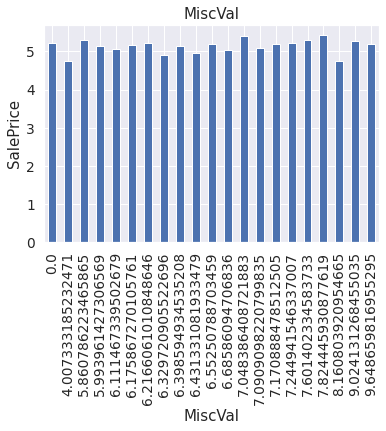

In [523]:
discrete_feature=[feature for feature in data_num if 
                  len(data_num[feature].unique())<25 and feature not in year_feature+['Id']]

print("Discrete Variables Count: {}".format(len(discrete_feature)))


## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    dataset=data.copy()
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()



Continuous feature Count 16


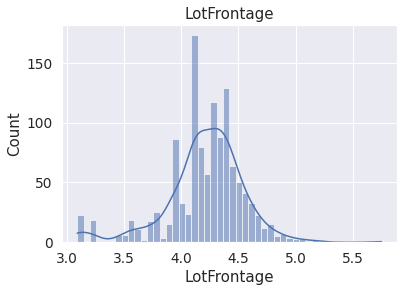

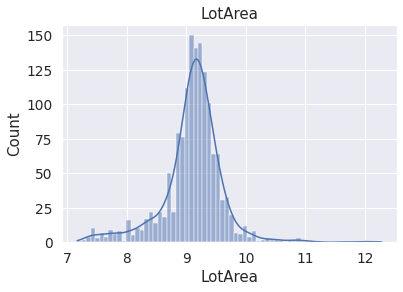

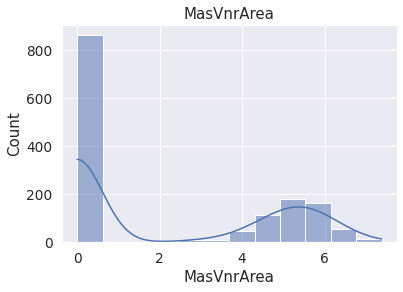

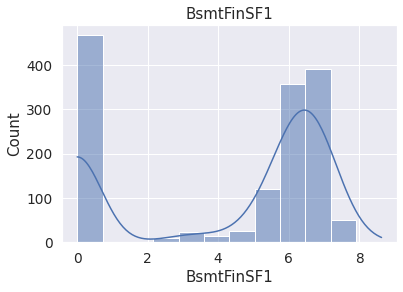

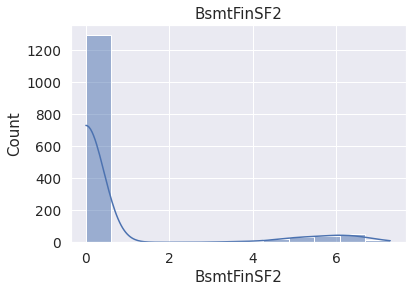

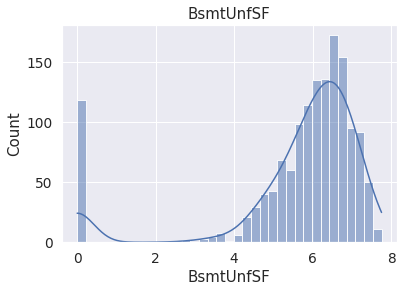

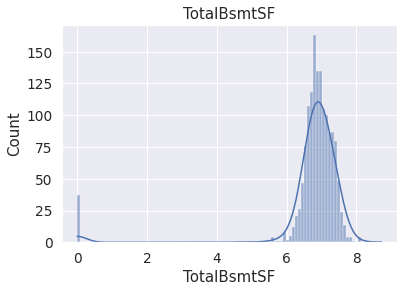

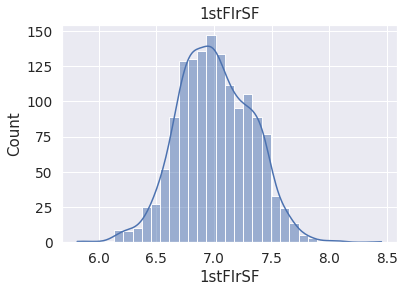

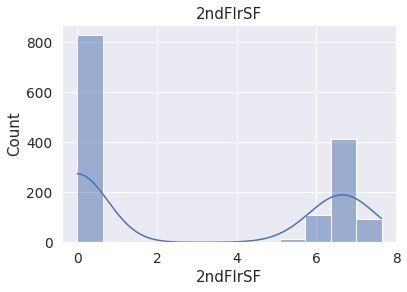

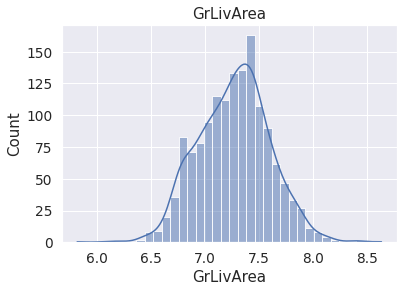

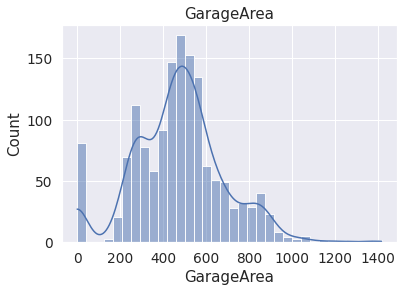

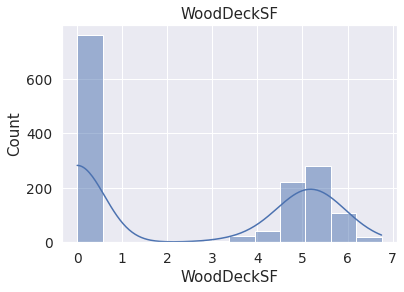

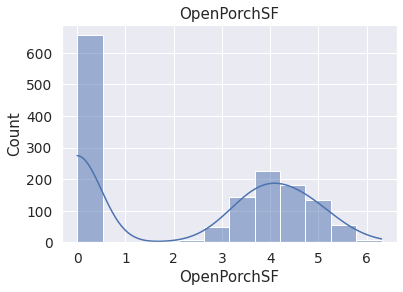

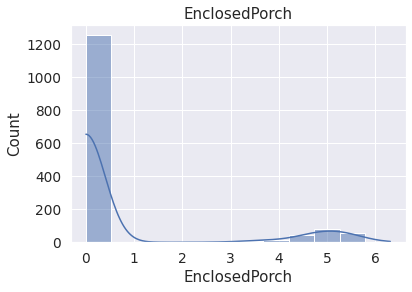

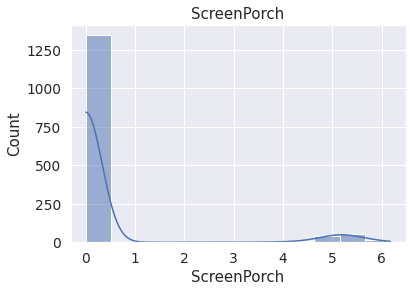

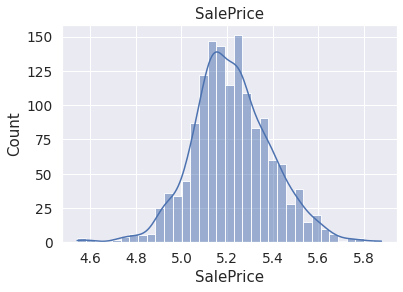

In [524]:
continuous_feature=[feature for feature in data_num if 
                    feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))



## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    dataset=data.copy()
    sns.histplot(dataset[feature],kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

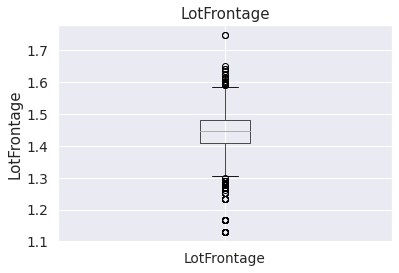

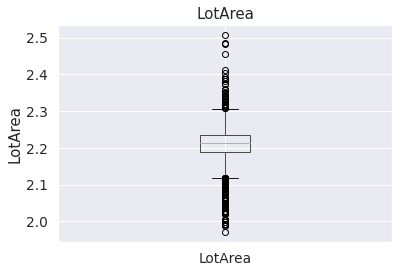

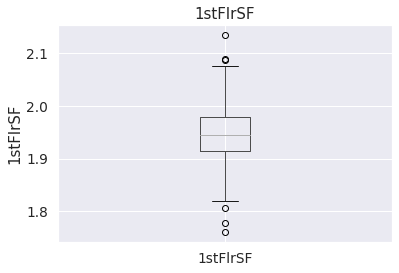

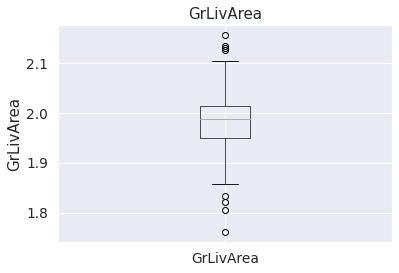

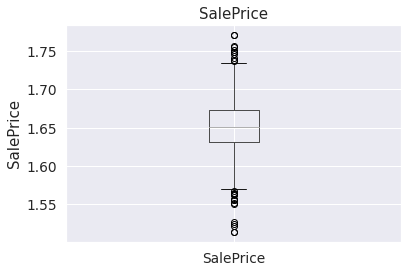

In [525]:
# Outliers
for feature in continuous_feature:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(data[feature])
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [526]:
missing_columns=data_num.columns[data_num.isnull().any()].tolist()

for feature in missing_columns:
    #data[feature +"_imp"]=data[feature]
    data=random_imputation(data,feature)

#data_num.drop(["LotFrontage_imp"],axis=1,inplace=True,errors="ignore")
data_num=numerical_imputation(data_num,missing_columns)
data_obj=pd.DataFrame(categorical_imputation(data_obj),columns=data_obj.columns)
data[data_num.columns]=data_num.astype("float64")
data[data_obj.columns]=data_obj.astype("float64")

/home/acr00/vir_env/lib/python3.10/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


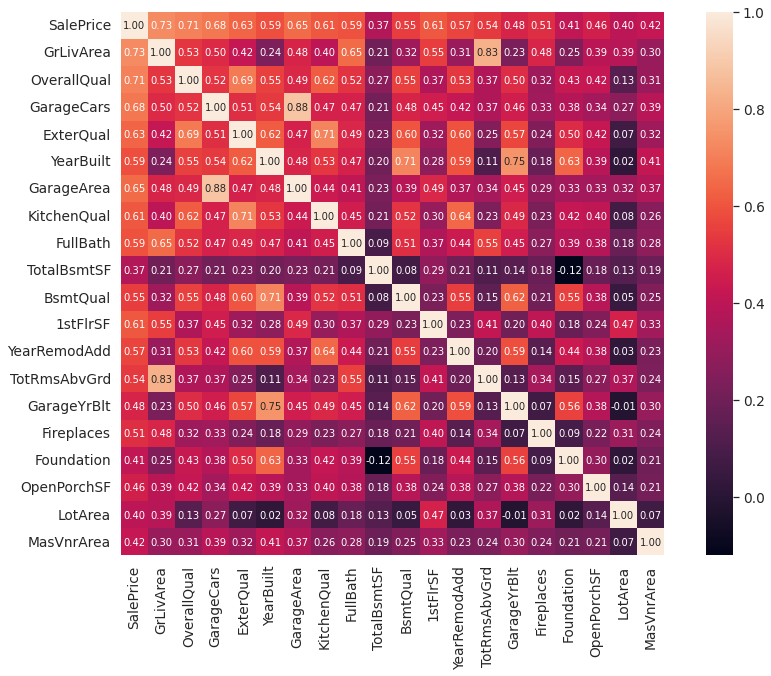

In [527]:
k=20 # we're zooming 
no_of_observations=10
corr=data.corr(method='spearman',min_periods=no_of_observations)
nlargest_col=corr.nlargest(k, 'SalePrice')['SalePrice'].index
corr_nlargest=np.corrcoef(data[nlargest_col].values.T)
plt.figure(figsize=(15,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(corr_nlargest,cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=nlargest_col.values, 
                 xticklabels=nlargest_col.values)
plt.show()

In [528]:
df_train=data

In [529]:
#df_train.isnull().sum()

In [530]:
data=df_test

In [531]:
data_num,data_obj = preprocess_to_category(data)

missing_columns=data_num.columns[data_num.isnull().any()].tolist()

for feature in missing_columns:
    #data[feature +"_imp"]=data[feature]
    data=random_imputation(data,feature)

#data_num.drop(["LotFrontage_imp"],axis=1,inplace=True,errors="ignore")
data_num=numerical_imputation(data_num,missing_columns)
data_obj=pd.DataFrame(categorical_imputation(data_obj),columns=data_obj.columns)
data[data_num.columns]=data_num.astype("float64")
data[data_obj.columns]=data_obj.astype("float64")


/home/acr00/vir_env/lib/python3.10/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [532]:
df_test=data

In [533]:
#df_test.isnull().sum()

In [534]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer,r2_score

In [535]:
X=df_train.iloc[:,:-1]
y=df_train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1022, 80)
X_test : (438, 80)
y_train : (1022,)
y_test : (438,)


In [536]:
#sc = RobustScaler()
scaler=StandardScaler()
#X_train_scaled=scaler.fit_transform(X_train) 
# let's do fit() & transform() separately for X_train
X_train_fit=scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
# transform X_test
X_test_scaled=scaler.transform(X_test) 
#use orginal variable for convenience
X_train=X_train_scaled
X_test=X_test_scaled

In [537]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)


In [538]:
#  Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 60.0


In [539]:
print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

Try again for more precision with alphas centered around 60.0
Best alpha : 84.0
Ridge RMSE on Training set : 0.06140713667616972
Ridge RMSE on Test set : 0.07063096151949572


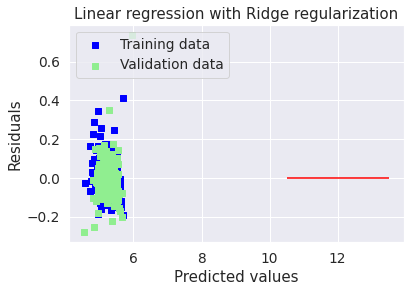

In [540]:
# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

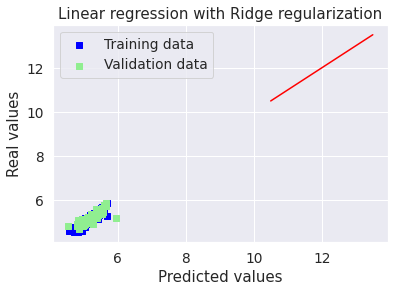

In [541]:
# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()


Ridge picked 79 features and eliminated the other 1 features


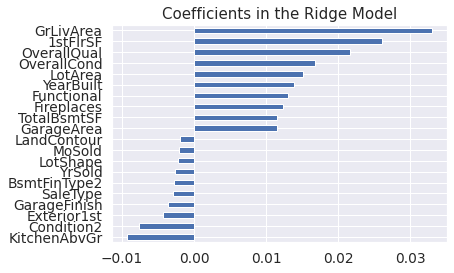

In [542]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = df_test.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " + 
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [543]:
X=df_test
scaler=StandardScaler()
#X_train_scaled=scaler.fit_transform(X_train) 
# let's do fit() & transform() separately for X
X_train_fit=scaler.fit(X)
X_train_scaled=scaler.transform(X)

In [544]:
pred=np.exp(ridge.predict(X_train_scaled))
solution = pd.DataFrame({"id":df_test.Id.astype("int64"), "SalePrice":preds})
solution.head(5)
#solution.to_csv("submission.csv", index = False)

,id,SalePrice
0,1461,114.214220
1,1462,127.119668
2,1463,124.078441
3,1464,109.661634
4,1465,109.249906


In [545]:
sample=pd.read_csv("sample_submission.csv")
sample.head(5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [546]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

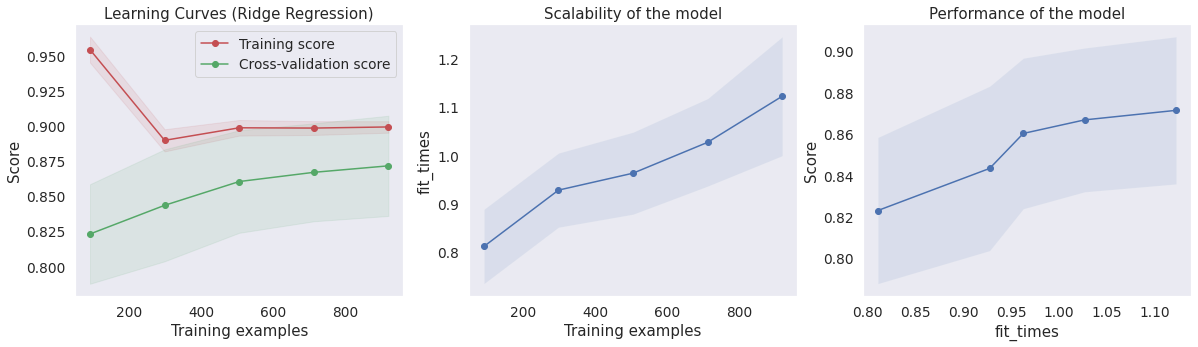

In [547]:
title = r"Learning Curves (Ridge Regression)"
plot_learning_curve(ridge, title, X_train,y_train, cv=10, n_jobs=-1,scoring="r2")

plt.show()

In [548]:
# import sklearn
# sklearn.metrics.get_scorer_names()

In [549]:
import xgboost as xgb

In [550]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

In [551]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=360, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [552]:
print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_xgb=pred=model_xgb.predict(X_train)
y_test_xgb=model_xgb.predict(X_test)

Ridge RMSE on Training set : 0.06140713667616972
Ridge RMSE on Test set : 0.07063096151949572


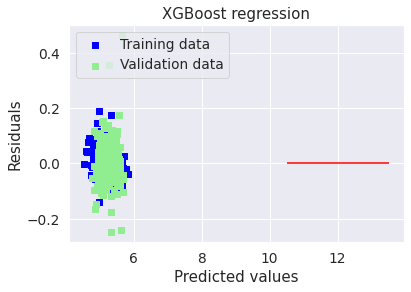

In [553]:
# Plot residuals
plt.scatter(y_train_xgb, y_train_xgb - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_xgb, y_test_xgb - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("XGBoost regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

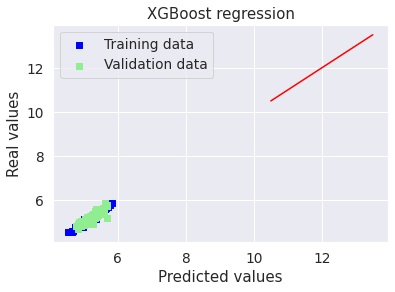

In [554]:
# Plot predictions
plt.scatter(y_train_xgb, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_xgb, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("XGBoost regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()


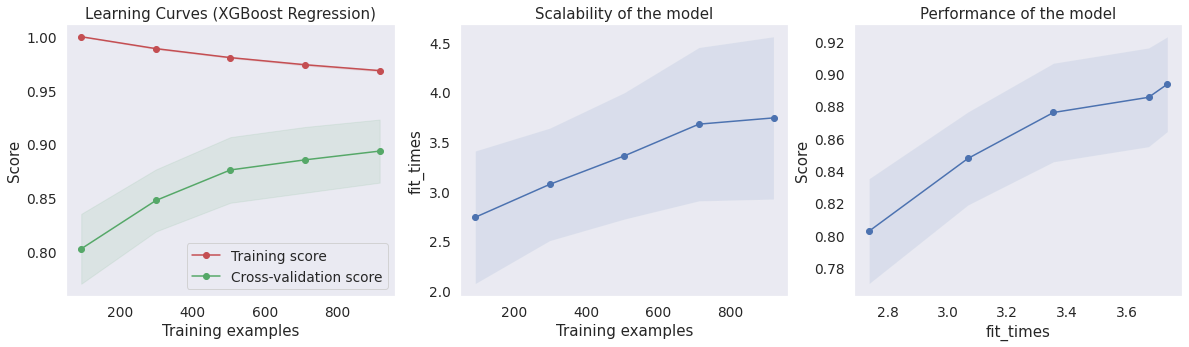

In [555]:
title = r"Learning Curves (XGBoost Regression)"
plot_learning_curve(model_xgb, title, X_train,y_train, cv=10, n_jobs=-1,scoring="r2")

plt.show()

In [558]:
#solution.to_csv("submission.csv", index = False)
# te=pd.read_csv("submission.csv")
# te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
